<a href="https://colab.research.google.com/github/AGronowski/M-zgSeizurePrediction/blob/master/dtw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd 

In [59]:
# Only run if using colab and starting from current point
from google.colab import drive
drive.mount('/content/drive/')
d=pd.read_csv("drive/My Drive/data.csv") 
d

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,-57,-64,-73,-79,-76,-70,-63,-57,-57,-50,-45,-34,-33,-32,-30,-24,-24,-18,-9,-2,0,2,-3,-5,-13,-23,-39,-53,-59,...,45,55,60,69,68,58,54,44,40,38,39,39,32,23,22,14,13,15,18,20,20,25,28,29,29,29,26,24,24,20,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,136,78,8,-66,-132,-180,-210,-227,-225,-212,-192,-168,-144,-117,-88,-54,-21,6,29,46,60,76,92,110,128,152,171,150,91,21,...,69,58,38,16,25,75,165,260,343,406,456,471,461,412,319,175,-5,-171,-293,-357,-378,-370,-346,-316,-278,-241,-201,-162,-126,-94,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,14,-1,-10,14,44,77,61,42,32,29,22,26,35,81,66,50,57,91,121,111,73,38,23,35,21,11,-12,2,17,61,...,-90,-62,-38,-40,-21,-23,-11,-4,-9,-22,-42,-49,-48,-40,-40,-46,-43,-67,-67,-50,-18,-14,-39,-74,-86,-75,-68,-57,-78,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,29,22,6,1,-28,-37,-35,-35,-45,-64,-105,-140,-157,-157,-147,-153,-147,-126,-112,-83,-56,-41,-40,-38,-34,-47,-41,-40,-42,-49,...,-98,-77,-60,-73,-88,-97,-118,-108,-100,-97,-91,-109,-122,-134,-137,-107,-95,-67,-54,-40,-31,-19,7,22,46,68,87,97,105,114,121,135,148,143,116,86,68,59,55,3


In [60]:
#y=1 means patient is having seizure. Any other number means that they're not having a seizure (see the dataset description for more details)
#So to make this a binary problem I'll turn every non-1 value into a 0 

d['class'] = d.y==1  #note that d.y==1 is a elementwise boolean comparison 
d['class'] = d['class'].astype(int) #converts the booleans made in the line above to ints 

#Removing the original y and the useless patient IDs. 
#Note that .pop('y') is the same as .drop('y', axis=1,inplace=True) but is more concise :)
d.pop('y')
d.pop('Unnamed: 0')
print()

In [0]:
y = d['class'] #sets y to be class column 
X = d.iloc[:,0:(d.shape[1]-1)] #sets X to be dataset with class column removed 

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [63]:
!pip install dtw

In [0]:
from dtw import dtw
import numpy as np

In [65]:
#get first 3 rows from dataframe

firstrow = X.iloc[0,:]
firstrow = firstrow.to_numpy()
firstrow.reshape(-1, 1)

secondrow = X.iloc[1,:]
secondrow = secondrow.to_numpy()
secondrow.reshape(-1, 1)

thirdrow = X.iloc[2,:]
thirdrow = thirdrow.to_numpy()
thirdrow.reshape(-1, 1)



array([[ -32],
       [ -39],
       [ -47],
       [ -37],
       [ -32],
       [ -36],
       [ -57],
       [ -73],
       [ -85],
       [ -94],
       [ -99],
       [ -94],
       [ -96],
       [-104],
       [-103],
       [ -92],
       [ -75],
       [ -69],
       [ -69],
       [ -53],
       [ -37],
       [ -14],
       [ -10],
       [ -39],
       [ -78],
       [-102],
       [ -98],
       [ -80],
       [ -54],
       [ -40],
       [ -35],
       [ -39],
       [ -32],
       [ -13],
       [   7],
       [  34],
       [  41],
       [  33],
       [   6],
       [ -15],
       [ -30],
       [ -47],
       [ -53],
       [ -65],
       [ -64],
       [ -68],
       [ -85],
       [ -98],
       [-109],
       [ -82],
       [ -57],
       [ -38],
       [ -40],
       [ -36],
       [ -31],
       [ -13],
       [  11],
       [  19],
       [   9],
       [ -20],
       [ -48],
       [ -71],
       [ -71],
       [ -57],
       [ -32],
       [ -13],
       [  

In [0]:

# You can also visualise the accumulated cost and the shortest path
import matplotlib.pyplot as plt

54020.0


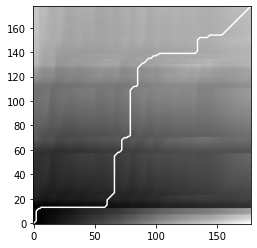

9256.0


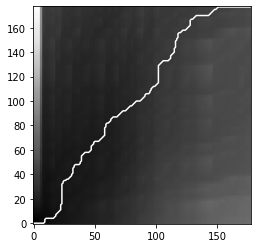

In [67]:
x = firstrow
y = secondrow

#visualize dtw distance between 1st and 2nd row

manhattan_distance = lambda x, y: np.abs(x - y)
distance, cost_matrix, acc_cost_matrix, path = dtw(x, y, dist=manhattan_distance)
print(distance)



plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.show()


#visualize dtw distance between 1st and 3rd row
y = thirdrow

manhattan_distance = lambda x, y: np.abs(x - y)
distance, cost_matrix, acc_cost_matrix, path = dtw(x, y, dist=manhattan_distance)
print(distance)


plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.show()




In [68]:
!pip install dtaidistance

In [45]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import numpy as np
path = dtw.warping_path(x, y)
distance = dtw.distance(x, y)
print(distance)

4782.875913088275


In [46]:
#get 1st 100 rows as an array
num_rows = 100

series = []
for i in range(num_rows):
  firstrow = X.iloc[i,:]
  firstrow = firstrow.to_numpy()
  series.append(firstrow)
series


[array([ 135,  190,  229,  223,  192,  125,   55,   -9,  -33,  -38,  -10,
          35,   64,  113,  152,  164,  127,   50,  -47, -121, -138, -125,
        -101,  -50,   11,   39,   24,   48,   64,   46,   13,  -19,  -61,
         -96, -130, -132, -116, -115,  -71,  -14,   25,   19,    6,    9,
          21,   13,  -37,  -58,  -33,    5,   47,   80,  101,   88,   73,
          69,   41,  -13,  -31,  -61,  -80,  -77,  -66,  -43,    5,   87,
         129,  121,   88,   12,  -76, -150, -207, -186, -165, -148, -103,
         -33,   40,   94,   75,    8,  -81, -155, -227, -262, -233, -218,
        -187, -126,  -65,  -12,   27,   61,   49,    9,  -46, -124, -210,
        -281, -265, -181,  -89,   -4,   53,   53,   38,   43,   31,   34,
           9,   -7,  -34,  -70,  -84, -101,  -70,  -11,   42,   62,   66,
          74,   64,   59,   56,   36,  -11,  -30,  -43,  -23,    8,   42,
          77,  103,  135,  121,   79,   59,   43,   54,   90,  111,  107,
          64,   32,   18,  -25,  -69, 

In [47]:
#get the distance matrix
ds = dtw.distance_matrix(series)
ds

array([[          inf, 4782.87591309,  897.33215701, ...,  875.53069621,
         904.92320116,  651.97776036],
       [          inf,           inf, 5692.18762867, ..., 5573.78067383,
        5583.78849886, 5326.92359622],
       [          inf,           inf,           inf, ...,  332.60336739,
         559.58913499,  453.90087023],
       ...,
       [          inf,           inf,           inf, ...,           inf,
         533.81738451,  456.69136186],
       [          inf,           inf,           inf, ...,           inf,
                  inf,  403.65207791],
       [          inf,           inf,           inf, ...,           inf,
                  inf,           inf]])

In [48]:
#remove infinite values from the distance matrix
ds[:] = np.nan_to_num(ds)
ds

array([[1.79769313e+308, 4.78287591e+003, 8.97332157e+002, ...,
        8.75530696e+002, 9.04923201e+002, 6.51977760e+002],
       [1.79769313e+308, 1.79769313e+308, 5.69218763e+003, ...,
        5.57378067e+003, 5.58378850e+003, 5.32692360e+003],
       [1.79769313e+308, 1.79769313e+308, 1.79769313e+308, ...,
        3.32603367e+002, 5.59589135e+002, 4.53900870e+002],
       ...,
       [1.79769313e+308, 1.79769313e+308, 1.79769313e+308, ...,
        1.79769313e+308, 5.33817385e+002, 4.56691362e+002],
       [1.79769313e+308, 1.79769313e+308, 1.79769313e+308, ...,
        1.79769313e+308, 1.79769313e+308, 4.03652078e+002],
       [1.79769313e+308, 1.79769313e+308, 1.79769313e+308, ...,
        1.79769313e+308, 1.79769313e+308, 1.79769313e+308]])

In [0]:
import editdistance as edist

import numpy as np
from sklearn.cluster import AgglomerativeClustering

In [50]:
#Use AgglomerativeClustering using the previous distance matrix

agg = AgglomerativeClustering(n_clusters=2, affinity='precomputed',
                              linkage='average')

# Use the distance matrix directly.
u = agg.fit_predict(ds)
print(u)


[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [0]:
import matplotlib.pyplot as plt

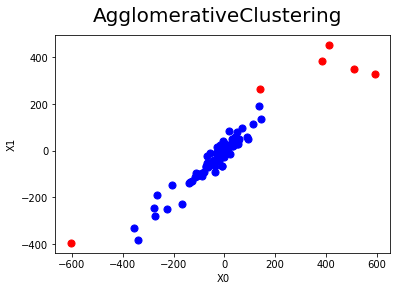

In [53]:
#Plot clustering results

plt.figure()
# plt.axes([0, 0, 1, 1])
# for l, c in zip(np.arange(2), 'rgbk'):
#     plt.plot(u[agg.labels_ == l].T, c=c, alpha=.5)


for i in range(num_rows):
  if u[i] == 0:
    plt.scatter(X.iloc[i,0], X.iloc[i, 1], s=50, marker='o', color='red')
  else:
    plt.scatter(X.iloc[i,0], X.iloc[i, 1], s=50, marker='o', color='blue')

color = 'black'
plt.suptitle("AgglomerativeClustering" , size=20,color=color)
plt.xlabel('X0',color=color)
plt.ylabel('X1',color=color)
plt.tick_params(colors = color)
plt.show()